In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("01_austin_traffic_hw.ipynb")

# Assignment 01: Austin Traffic Data

## Understanding APIs for Data Download

### What is an API?
An **API (Application Programming Interface)** is a way for different software programs to communicate with each other. Think of it as a waiter in a restaurant - you (the client) make a request to the waiter (API), who then goes to the kitchen (server) and brings back your order (data).

### Why Use APIs for Data?
- **Real-time data**: Get the most current information
- **Structured format**: Data comes in organized formats like JSON
- **Filtered requests**: Only download the data you need
- **Automated access**: Can be integrated into your code easily

### Austin Open Data API
The City of Austin provides free access to public datasets through their API. Today we'll work with traffic incident data.

**Base URL**: `https://data.austintexas.gov/resource/dx9v-zd7x.json`

### Common API Parameters
- `$limit`: How many records to return (default: 1000, max: 50,000)
- `$where`: Filter data based on conditions
- `$order`: Sort the results
- `$select`: Choose specific columns only

Let's start with basic examples:

### Basic API Call

In [ ]:
# This URL points to Austin Traffic Incident dataset
url = 'https://data.austintexas.gov/resource/dx9v-zd7x.json'
fname = 'austin.json'  # Local filename to save the downloaded data

# Using wget command to download data
# wget is a command-line tool that retrieves files from web servers
# -O flag specifies the output filename
!wget {url} -O {fname}

### Reading and Exploring the Downloaded Data

In [ ]:
import pandas as pd

# Read the JSON file into a pandas DataFrame
# JSON (JavaScript Object Notation) is a common format for API responses
df = pd.read_json(fname)
print(f'Number of datapoints: {len(df)}')

df.head()

### Using the `$limit` Parameter

By default, APIs often limit results to prevent overwhelming the server

The Austin API defaults to 1000 records, but we can request up to 50,000

In [ ]:
# Let's get 5000 records instead of the default 1000
desired_limit = 5000
url = f'https://data.austintexas.gov/resource/dx9v-zd7x.json?$limit={desired_limit}'
fname = 'austin.json'

!wget '{url}' -O {fname}

# Load and check the new dataset
df = pd.read_json(fname)
print(f'Number of datapoints: {len(df)}')

### Filtering Data with $where Parameter

Often you don't want ALL the data - just data that meets certain criteria

The `$where` parameter lets you filter data on the server side (more efficient!)

In [ ]:
# Let's get traffic incidents from a specific date range (Monday, Sept 15, 2025)
start_date = "2025-09-15T00:00:00.000Z"  # Start of Monday
end_date = "2025-09-16T00:00:00.000Z"    # Start of Tuesday (end of Monday)
limit = 10000                            # Safety limit (up to 50,000 allowed)
fname = 'monday.json'

# Construct the filter string
# Note: We need to encode special characters in URLs
filtering_string = f'$where=published_date>="{start_date}" AND published_date<"{end_date}"'

# Build the complete URL with both limit and filter parameters
# Multiple parameters are separated by &
url = f'https://data.austintexas.gov/resource/dx9v-zd7x.json?$limit={limit}&{filtering_string}'

!wget '{url}' -O {fname}

# Load and examine the filtered dataset
monday_df = pd.read_json(fname)
monday_df.head()

<!-- BEGIN QUESTION -->

## Q1 How was your Monday?
Using the Monday traffic data (september 15, 2025) that you downloaded earlier:

1. Find the top 3 most frequent incident types (e.g., "Crash Service", "Traffic Hazard", etc.)
2. Create a scatter plot showing the geographic locations of these top 3 incident types, using a different color for each type. It should look similar to this plot.


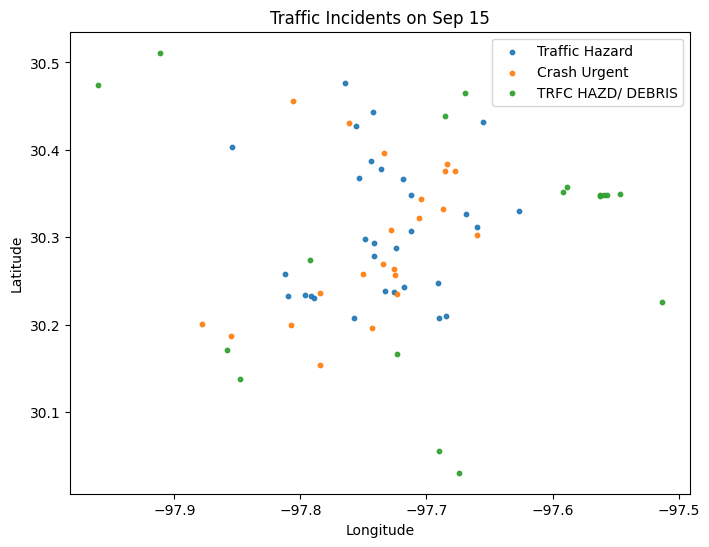

In [ ]:
# Write your answers here!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Q2 How was your summer?

Instead of checking one day's data, let's analyze Austin driving patterns during summer 2025 (July and August).

  1. **Download summer data**: Use the API with `$where` parameter to download all traffic incidents published during July 1-August 31, 2025
  2. **Daily incident trends**: Create a line plot comparing July vs August daily incidents:
     - X-axis: Day of month (1-31)
     - Y-axis: Total incident count
     - Two lines: one for July, one for August
  3. **Day-of-week patterns**: Create a bar chart comparing total incidents by day of week:
     - X-axis: Days of week (Monday through Sunday)
     - Y-axis: Total incidents per day
     - Two sets of bars: July vs August (use different colors)
  **Hint**: You'll need to:
  - Filter data using date ranges in your API call
  - Extract day-of-week information from the `published_date` column
  - Use `pd.to_datetime` and `pandas.Series.dt.day_name` to convert time to weekday name (https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day_name.html#pandas.Series.dt.day_name)

  <div style="display: flex;">
    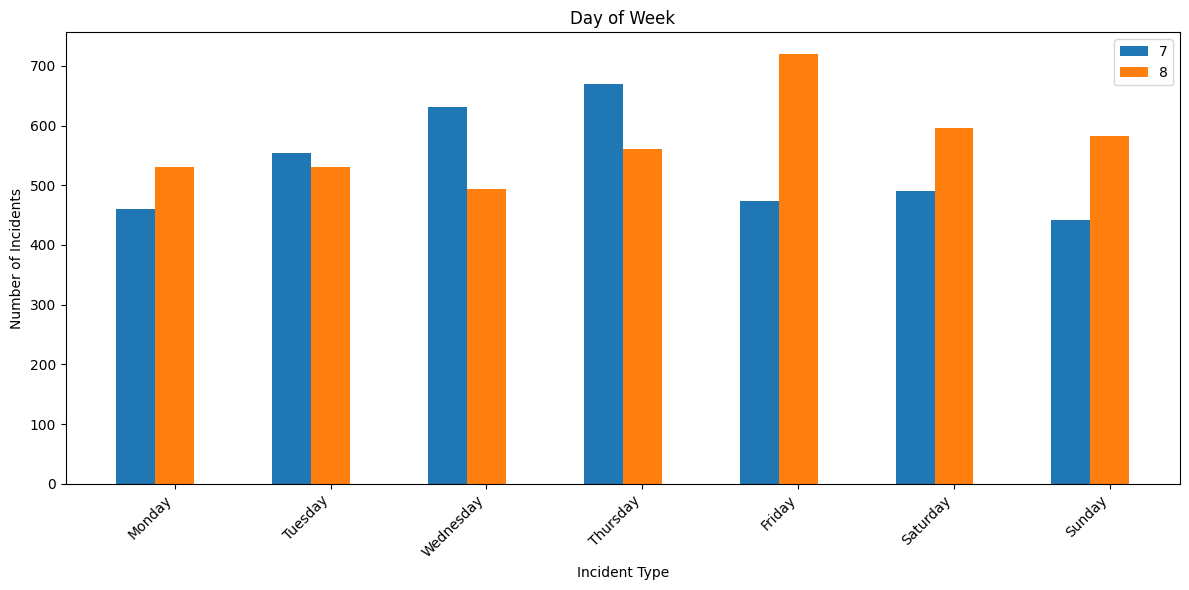
    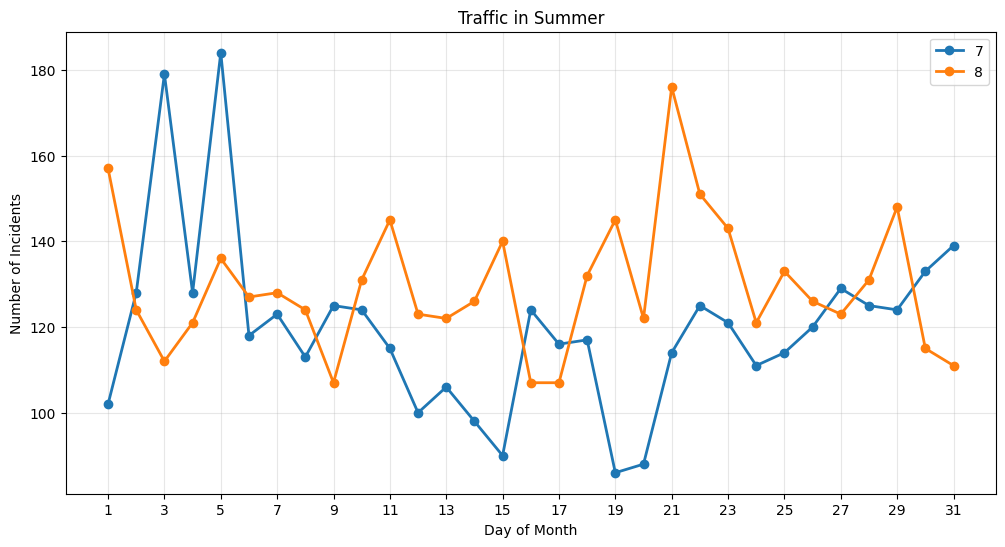
  </div>

In [ ]:
# Write your answers here!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Q3 What do you think?
Write a **SHORT** paragraph to discuss what you find.

In [ ]:
# Write your answers in a Markdown cell

<!-- END QUESTION -->

